In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import math
%matplotlib inline

In [2]:
df1 = pd.read_csv('hw3.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 9 columns):
ts           2667 non-null object
open         2667 non-null float64
high         2163 non-null float64
low          2378 non-null float64
close        2531 non-null float64
volume       2667 non-null float64
volumeUSD    0 non-null float64
token        2667 non-null object
chain        2667 non-null object
dtypes: float64(6), object(3)
memory usage: 187.6+ KB


In [4]:
df1['token'].value_counts()

BTC                                   323
COMP                                  322
SOL                                   318
CRV                                   318
USDT                                  314
UNI                                   312
AAVE                                  312
ETH                                   298
<span name="tokenName">UNI</span>      30
<span name="tokenName">ETH</span>      28
<span name="tokenName">USDT</span>     19
<span name="tokenName">CRV</span>      17
<span name="tokenName">SOL</span>      16
<span name="tokenName">AAVE</span>     16
<span name="tokenName">BTC</span>      14
<span name="tokenName">COMP</span>     10
Name: token, dtype: int64

In [5]:
df1.duplicated().sum()

307

In [6]:
df1 = df1.drop_duplicates()

In [7]:
df1['token'] = df1['token'].replace({'<span name="tokenName">UNI</span>': 'UNI', 
                                           '<span name="tokenName">ETH</span>': 'ETH',
                                           '<span name="tokenName">USDT</span>': 'USDT',
                                           '<span name="tokenName">CRV</span>': 'CRV',
                                           '<span name="tokenName">AAVE</span>': 'AAVE',
                                           '<span name="tokenName">SOL</span>': 'SOL',
                                           '<span name="tokenName">BTC</span>': 'BTC',
                                           '<span name="tokenName">COMP</span>': 'COMP'})

In [8]:
df1['token'].value_counts()

CRV     295
AAVE    295
COMP    295
UNI     295
ETH     295
BTC     295
SOL     295
USDT    295
Name: token, dtype: int64

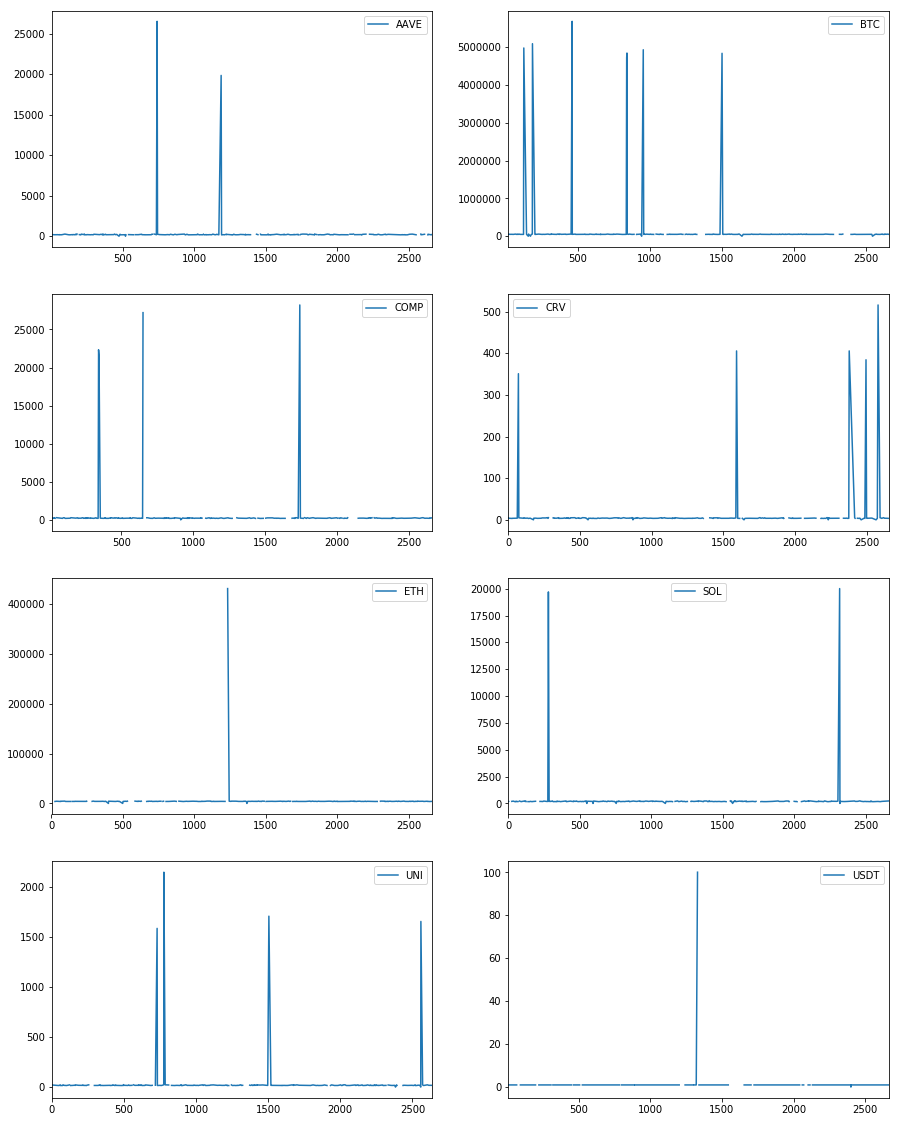

In [9]:
tokens_in_df1 = df1.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df1.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df1.size / 2)))

idx = 0
for label, df1_token in df1[['token', 'close']].groupby('token'):
    df1_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

In [10]:
df1.loc[df1['high'].isnull(), 'high'] = df1.loc[df1['high'].isnull(),'open'] 

In [11]:
df1.loc[df1['low'].isnull(), 'low'] = df1.loc[df1['low'].isnull(),'open'] 

In [12]:
df1.loc[df1['close'].isnull(), 'close'] = 0.5 * (df1.loc[df1['close'].isnull(),'high'] + df1.loc[df1['close'].isnull(),'low'])

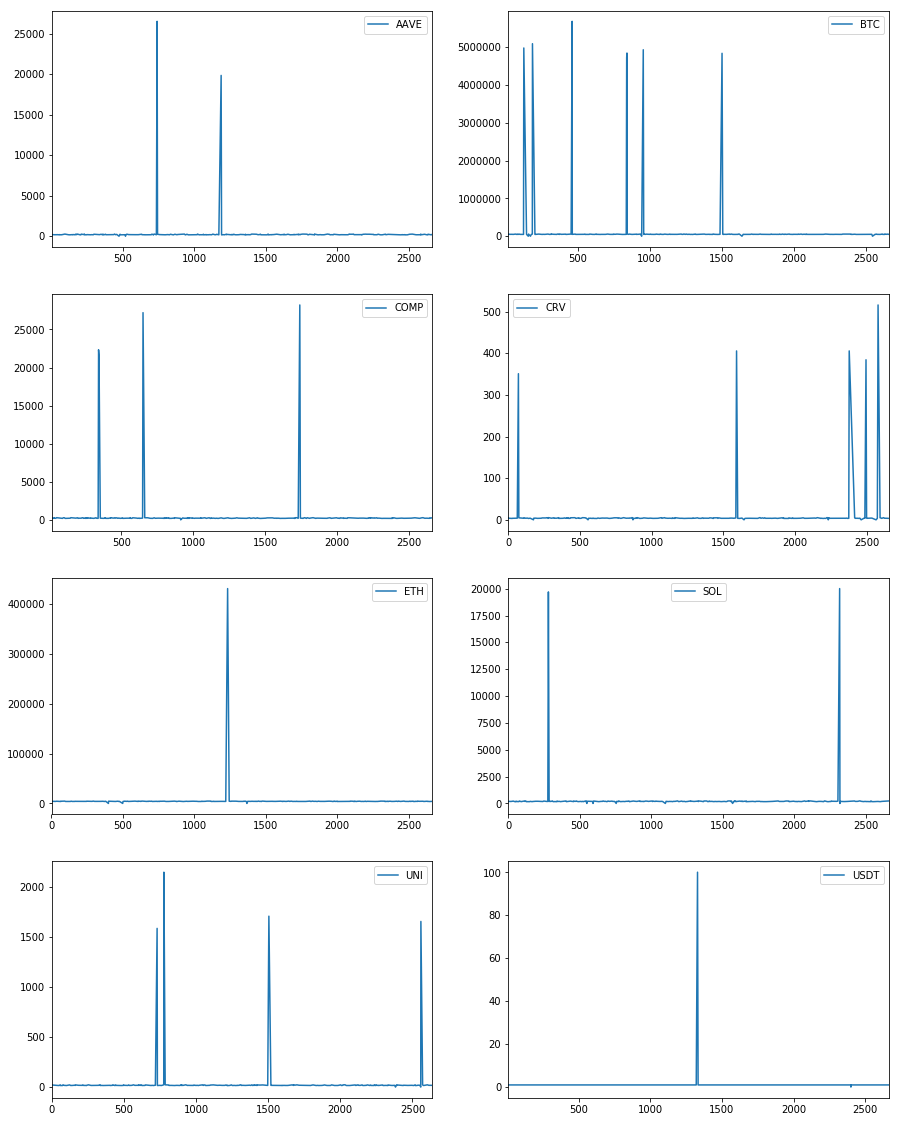

In [13]:
tokens_in_df1 = df1.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df1.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df1.size / 2)))

idx = 0
for label, df1_token in df1[['token', 'close']].groupby('token'):
    df1_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

In [14]:
df1.loc[df1.close / df1.open >= 2]

,ts,open,high,low,close,volume,volumeUSD,token,chain
71,2021-12-10 21:00:00,3.4600,3.5100,3.4600,351.00,1.080245e+05,NaN,CRV,ETH
127,2021-12-12 14:00:00,49542.3900,49542.3900,49534.7100,4983812.00,3.426704e+02,NaN,BTC,BTC
187,2021-12-07 08:00:00,51224.9900,51398.2600,50883.3400,5097338.00,4.433800e+02,NaN,BTC,BTC
282,2021-12-07 18:00:00,197.0930,197.8000,194.3450,19698.90,6.369084e+04,NaN,SOL,SOL
341,2021-12-08 01:00:00,223.8500,224.9800,220.3900,22333.00,1.477532e+03,NaN,COMP,ETH
344,2021-12-08 12:00:00,214.8900,217.1000,212.3800,21568.00,2.372441e+03,NaN,COMP,ETH
462,2021-12-02 23:00:00,56904.6500,56952.8100,56639.4900,5688883.00,3.821792e+02,NaN,BTC,BTC
650,2021-12-02 02:00:00,269.7800,272.1200,268.2900,27212.00,4.564180e+02,NaN,COMP,ETH
730,2021-12-06 07:00:00,16.0391,16.2298,15.8308,1584.74,7.441640e+04,NaN,UNI,ETH
741,2021-12-01 11:00:00,266.9360,267.9630,264.2370,26501.50,1.018631e+03,NaN,AAVE,ETH


In [15]:
df1.loc[df1.close / df1.open >= 2,'close']= 0.5 * (df1.loc[df1.close / df1.open >= 2,'high'] + df1.loc[df1.close / df1.open >= 2,'low'])

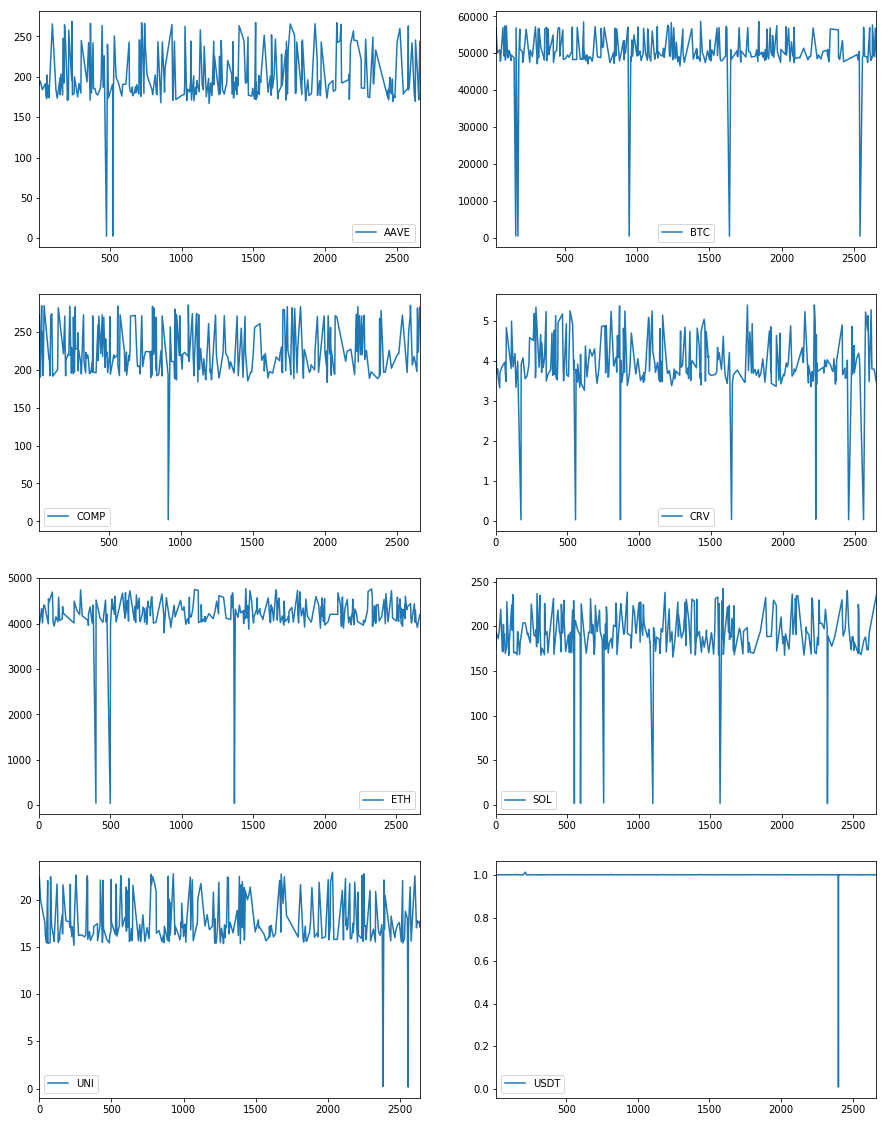

In [16]:
tokens_in_df1 = df1.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df1.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df1.size / 2)))

idx = 0
for label, df1_token in df1[['token', 'close']].groupby('token'):
    df1_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

In [18]:
df1.loc[df1.open / df1.close >= 2]

,ts,open,high,low,close,volume,volumeUSD,token,chain
158,2021-12-03 12:00:00,56891.7000,57209.7000,56858.0200,570.337400,1.897550e+02,NaN,BTC,BTC
173,2021-12-07 07:00:00,50941.5000,51272.8300,50936.0500,512.250000,3.124719e+02,NaN,BTC,BTC
176,2021-12-06 01:00:00,3.6302,3.6365,3.4638,0.035758,4.227913e+05,NaN,CRV,ETH
399,2021-12-03 08:00:00,4584.3400,4588.0300,4548.0600,45.722700,2.468821e+03,NaN,ETH,ETH
475,2021-12-02 08:00:00,245.8090,247.5180,245.7290,2.467160,3.166740e+02,NaN,AAVE,ETH
499,2021-12-10 23:00:00,3996.1700,3996.1700,3953.7700,39.613200,8.379371e+03,NaN,ETH,ETH
520,2021-12-01 17:00:00,265.2620,265.2620,262.9060,2.632300,9.809190e+02,NaN,AAVE,ETH
551,2021-12-11 12:00:00,171.8500,172.4100,169.9900,1.700800,1.572705e+04,NaN,SOL,SOL
556,2021-12-10 08:00:00,3.5900,3.6300,3.5400,0.035700,1.034540e+05,NaN,CRV,ETH
594,2021-12-09 21:00:00,181.3980,181.9630,178.7750,1.809360,1.044998e+05,NaN,SOL,SOL


In [19]:
df1.loc[df1.open / df1.close >= 2,'close']= 0.5 * (df1.loc[df1.open / df1.close >= 2,'high'] + df1.loc[df1.open / df1.close >= 2,'low'])

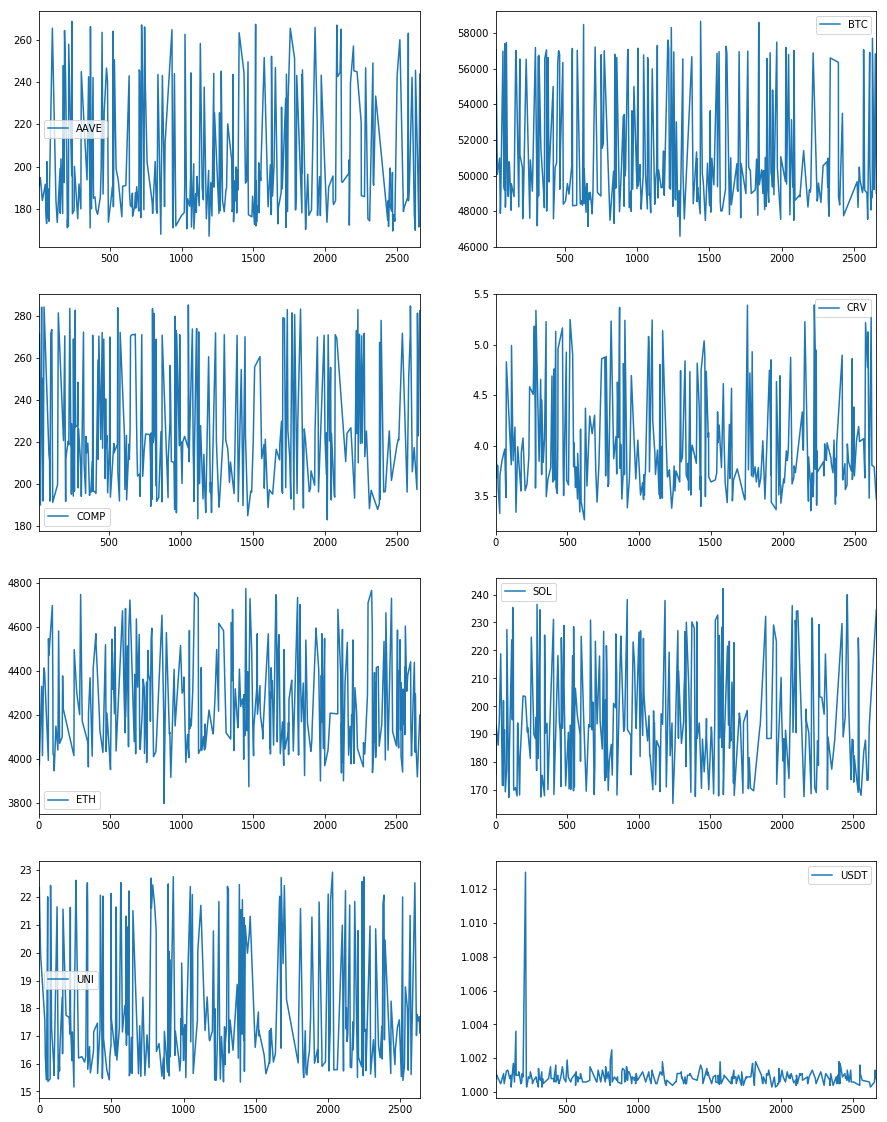

In [20]:
tokens_in_df1 = df1.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df1.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df1.size / 2)))

idx = 0
for label, df1_token in df1[['token', 'close']].groupby('token'):
    df1_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

In [21]:
df1['volumeUSD'] = df1['volume'] * df1['close']

In [22]:
df1.groupby(['chain'])['volumeUSD'].sum().to_frame()

,volumeUSD
chain,
BTC,1.095893e+10
ETH,1.364762e+10
SOL,4.075514e+09
USDT,1.008247e+09
